# Лабораторна робота .  SVM та Kernel SVM за допомогою Python Scikit-Learn

Реалізувати SVM для визначення підроблених банкнот. 
Реалізувати різні варанти ядра, порівняти результати.

В якості допомоги скористатися посиланням https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Пояснити кожен параметр функції SVC.

Візуалізувати результати з різним значення параметру С

Візуалізувати результати з різним значенням параметру $\gamma$

Зробити висновки щодо значень параметрів

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ["variance", "skewness", "curtosis", "entropy", "class"]
dataset = pd.read_csv(url, header=None, names=columns)

print(dataset.head())

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
dataset.to_csv('banknote.csv', index=False)

In [5]:
df = pd.read_csv('banknote.csv')

In [6]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
classifier_linear = SVC(kernel='linear', C=1)
classifier_linear.fit(X_train, y_train)
y_pred_linear = classifier_linear.predict(X_test)

print("Лінійне ядро:\n", classification_report(y_test, y_pred_linear))

Лінійне ядро:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [13]:
classifier_rbf = SVC(kernel='rbf', C=1, gamma='scale')
classifier_rbf.fit(X_train, y_train)
y_pred_rbf = classifier_rbf.predict(X_test)

print("RBF ядро:\n", classification_report(y_test, y_pred_rbf))

RBF ядро:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [14]:
classifier_poly = SVC(kernel='poly', degree=3, C=1)
classifier_poly.fit(X_train, y_train)
y_pred_poly = classifier_poly.predict(X_test)

print("Поліноміальне ядро:\n", classification_report(y_test, y_pred_poly))

Поліноміальне ядро:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       191
           1       0.98      1.00      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



Точність для C=0.1: 0.91
Точність для C=1: 0.92
Точність для C=10: 0.93
Точність для C=100: 0.94


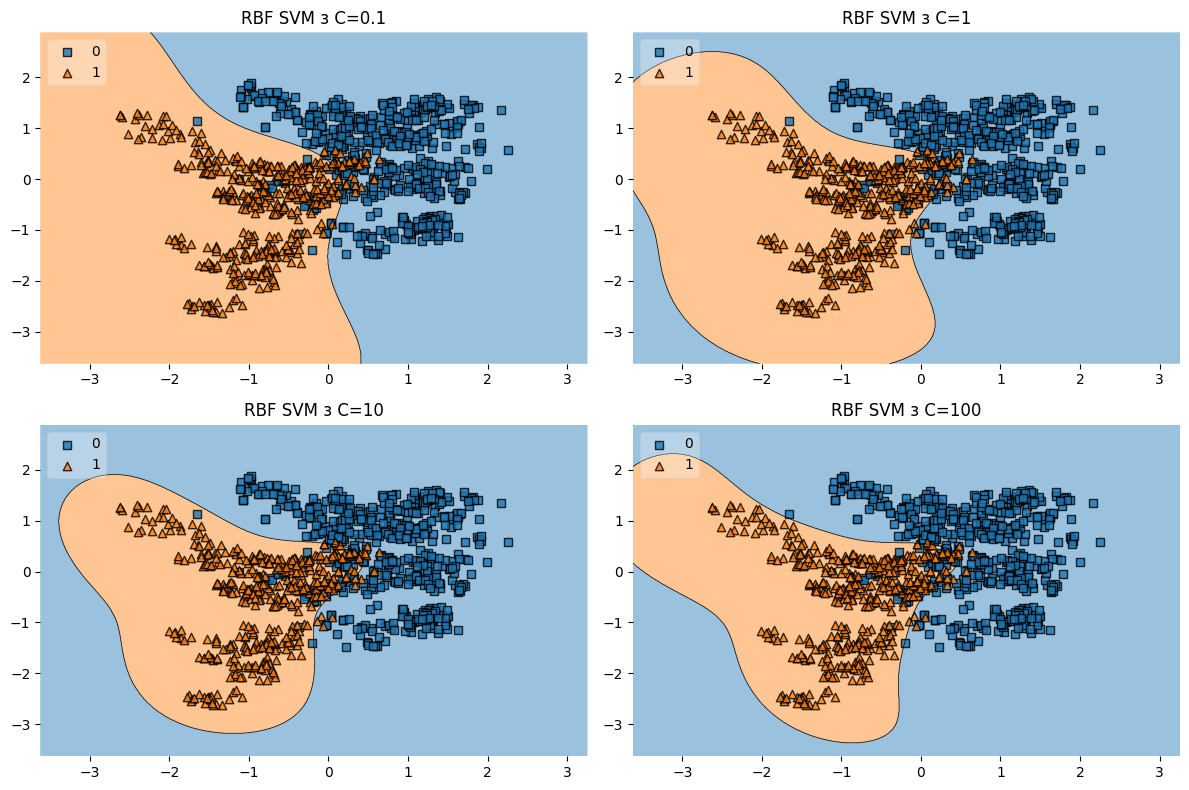

In [19]:
C_values = [0.1, 1, 10, 100]

plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values, 1):
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train[:, :2], y_train)
    y_pred = model.predict(X_test[:, :2])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Точність для C={C}: {accuracy:.2f}')

    plt.subplot(2, 2, i)
    plot_decision_regions(X_train[:, :2], y_train, clf=model, legend=2)
    plt.title(f'RBF SVM з C={C}')

plt.tight_layout()
plt.show()

Точність для gamma=0.01: 0.89
Точність для gamma=0.1: 0.91
Точність для gamma=1: 0.92
Точність для gamma=10: 0.93


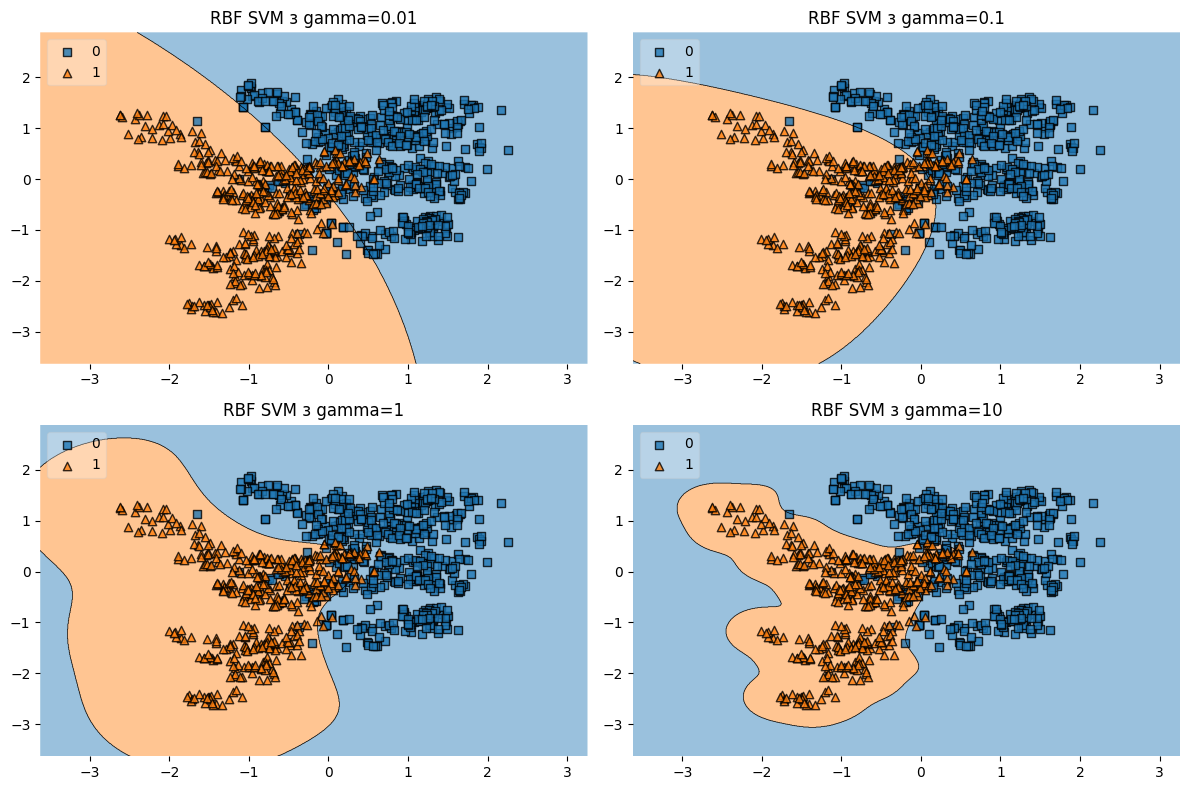

In [16]:
gamma_values = [0.01, 0.1, 1, 10]

plt.figure(figsize=(12, 8))

for i, gamma in enumerate(gamma_values, 1):
    model = SVC(kernel='rbf', C=1, gamma=gamma)
    model.fit(X_train[:, :2], y_train)

    y_pred = model.predict(X_test[:, :2])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Точність для gamma={gamma}: {accuracy:.2f}')
    plt.subplot(2, 2, i)
    plot_decision_regions(X_train[:, :2], y_train, clf=model, legend=2)
    plt.title(f'RBF SVM з gamma={gamma}')

plt.tight_layout()
plt.show()

In [22]:

C_values = [0.1, 1, 10, 100]

for C in C_values:
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train[:, :4], y_train)
    y_pred = model.predict(X_test[:, :4])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Точність для C={C}: {accuracy:.2f}')

Точність для C=0.1: 0.99
Точність для C=1: 1.00
Точність для C=10: 1.00
Точність для C=100: 1.00


In [23]:
gamma_values = [0.01, 0.1, 1, 10]

for gamma in gamma_values:
    model = SVC(kernel='rbf', C=1, gamma=gamma)
    model.fit(X_train[:, :4], y_train)
    y_pred = model.predict(X_test[:, :4])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Точність для gamma={gamma}: {accuracy:.2f}')

Точність для gamma=0.01: 0.98
Точність для gamma=0.1: 1.00
Точність для gamma=1: 1.00
Точність для gamma=10: 1.00
